## Problem

EazyDiner is a table reservation platform for consumers looking for dining places. Will a new customer who signs up with us, make a booking in the first 7 days of signing up? If the probability is <20% then keep it in a 0 bucket otherwise in a 1 bucket.

In [1]:
#importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime as dt
import seaborn as sns
import scikitplot as skplt

In [2]:
data1 = pd.read_excel(r'C:\Users\HP\Downloads\Sample_BOOKINGS_Dataset_1.xlsx')
data1.head(10)


,date,medium,restaurant_name,location,cust_id
0,2020-09-04,web,Spectra,"The Leela Ambience, Gurgaon",5015431352112
1,2020-09-06,google,Barbeque Nation,"Park Street Area, Kolkata",5015431352115
2,2020-09-01,google,Barbeque Nation,"Ambience Mall, Gurgaon",5015431352121
3,2020-09-04,google,Barbeque Pride,"Hitech City, Hyderabad",5015431352122
4,2020-09-06,google,Float Brewery,"Kalyan Nagar, North Bengaluru",5015431352123
5,2020-09-01,google,AB's - Absolute Barbecues,"Banjara Hills, Hyderabad",5015431352125
6,2020-09-04,google,AB's - Absolute Barbecues,"The Accord Metropolitan, Chennai",5015431352130
7,2020-09-01,google,AB's - Absolute Barbecues,Visakhapatnam,5015431352210
8,2020-09-01,google,Barbeque Nation,Kakinada,5015431352211
9,2020-09-01,google,AB's - Absolute Barbecues,Visakhapatnam,5015431352214


In [3]:
data2 = pd.read_excel(r'C:\Users\HP\Downloads\Sample_CUSTOMER_Dataset_2.xlsx')
data2.head(10)

,cust_id,name,city,gender,AGE,medium,signup_date
0,5015431352112,Juhi Agrawal,Delhi NCR,F,72,web,2020-09-01
1,5015431352113,Manish,Delhi NCR,M,45,android,2020-09-01
2,5015431352114,mani,Chennai,M,29,android,2020-09-01
3,5015431352115,Rija,Kolkata,F,60,google,2020-09-01
4,5015431352120,Bharath,NaN,NaN,32,google,2020-09-01
5,5015431352121,Aparna,Delhi NCR,F,27,google,2020-09-01
6,5015431352122,Pavan Sai Chandra,Hyderabad,M,69,google,2020-09-01
7,5015431352123,Vaseem,Bengaluru,M,38,google,2020-09-01
8,5015431352124,Sonu Kumar shaw,Kolkata,M,32,android,2020-09-01
9,5015431352125,Nandini,Hyderabad,F,73,google,2020-09-01


In [4]:
data1.shape

(61333, 5)

In [5]:
data2.shape

(98354, 7)

In [6]:
data1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 61333 entries, 0 to 61332
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   date             61332 non-null  datetime64[ns]
 1   medium           61333 non-null  object        
 2   restaurant_name  61333 non-null  object        
 3   location         61333 non-null  object        
 4   cust_id          61333 non-null  int64         
dtypes: datetime64[ns](1), int64(1), object(3)
memory usage: 2.3+ MB


We can see that non-null count for every column is same as the number of columns in shape hece null count is zero in data1.

In [7]:
data2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 98354 entries, 0 to 98353
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   cust_id      98354 non-null  int64         
 1   name         92756 non-null  object        
 2   city         80621 non-null  object        
 3   gender       4699 non-null   object        
 4   AGE          98354 non-null  int64         
 5   medium       98354 non-null  object        
 6   signup_date  98354 non-null  datetime64[ns]
dtypes: datetime64[ns](1), int64(2), object(4)
memory usage: 5.3+ MB


We can see that for some columns non-null count is less than total columns hence there are null values in data2. Hence, we will check null values in data2 using isnull.

In [8]:
data2.isnull().sum()

cust_id            0
name            5598
city           17733
gender         93655
AGE                0
medium             0
signup_date        0
dtype: int64

Now we can see that customer id is serving as the primary key and we can join both tables through cutomer id using outer join and form a merged dataset.

In [9]:
data3 = pd.merge(left=data1, right=data2, how='outer', left_on='cust_id', right_on='cust_id')
data3.head(5)

,date,medium_x,restaurant_name,location,cust_id,name,city,gender,AGE,medium_y,signup_date
0,2020-09-04,web,Spectra,"The Leela Ambience, Gurgaon",5015431352112,Juhi Agrawal,Delhi NCR,F,72,web,2020-09-01
1,2020-09-06,google,Barbeque Nation,"Park Street Area, Kolkata",5015431352115,Rija,Kolkata,F,60,google,2020-09-01
2,2020-09-01,google,Barbeque Nation,"Ambience Mall, Gurgaon",5015431352121,Aparna,Delhi NCR,F,27,google,2020-09-01
3,2020-09-04,google,Barbeque Pride,"Hitech City, Hyderabad",5015431352122,Pavan Sai Chandra,Hyderabad,M,69,google,2020-09-01
4,2020-09-06,google,Float Brewery,"Kalyan Nagar, North Bengaluru",5015431352123,Vaseem,Bengaluru,M,38,google,2020-09-01


In [10]:
data3.shape

(98354, 11)

In [11]:
data3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 98354 entries, 0 to 98353
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   date             61332 non-null  datetime64[ns]
 1   medium_x         61333 non-null  object        
 2   restaurant_name  61333 non-null  object        
 3   location         61333 non-null  object        
 4   cust_id          98354 non-null  int64         
 5   name             92756 non-null  object        
 6   city             80621 non-null  object        
 7   gender           4699 non-null   object        
 8   AGE              98354 non-null  int64         
 9   medium_y         98354 non-null  object        
 10  signup_date      98354 non-null  datetime64[ns]
dtypes: datetime64[ns](2), int64(2), object(7)
memory usage: 9.0+ MB


We can see that the non-null count if not equal to the total number of columns hence we can deduce that the merged dataset has null values.

In [12]:
data3.isnull().sum()

date               37022
medium_x           37021
restaurant_name    37021
location           37021
cust_id                0
name                5598
city               17733
gender             93655
AGE                    0
medium_y               0
signup_date            0
dtype: int64

Now we will visualise the total number of missing values in each column of the merged dataset.

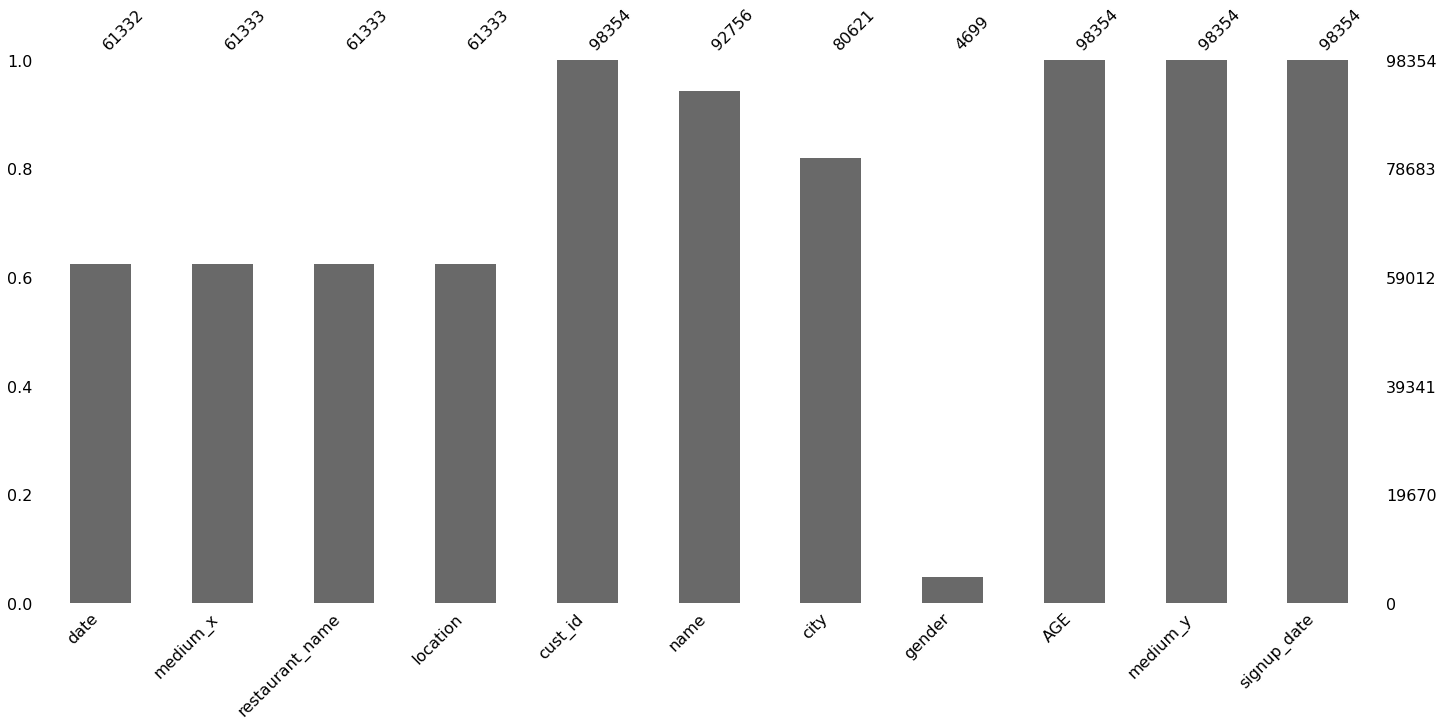

In [13]:
import missingno as msno
msno.bar(data3)

We can see from the data3 dataset that medium_x and medium_y values are same but in the above visualization there are null values present in medium_x hence we will fill those values with corresponding values available in medium_y.

In [14]:
data3.sort_values(by=['cust_id'], inplace=True)
data3.reset_index(drop=True, inplace=True)
data3.head()

,date,medium_x,restaurant_name,location,cust_id,name,city,gender,AGE,medium_y,signup_date
0,2020-09-04,web,Spectra,"The Leela Ambience, Gurgaon",5015431352112,Juhi Agrawal,Delhi NCR,F,72,web,2020-09-01
1,NaT,NaN,NaN,NaN,5015431352113,Manish,Delhi NCR,M,45,android,2020-09-01
2,NaT,NaN,NaN,NaN,5015431352114,mani,Chennai,M,29,android,2020-09-01
3,2020-09-06,google,Barbeque Nation,"Park Street Area, Kolkata",5015431352115,Rija,Kolkata,F,60,google,2020-09-01
4,NaT,NaN,NaN,NaN,5015431352120,Bharath,NaN,NaN,32,google,2020-09-01


We can see from the data3 dataset that medium_x and medium_y values are same but in the above visualization there are null values present in medium_x hence we will fill those values with corresponding values available in medium_y.

In [15]:
data3['medium']= data3['medium_x'].fillna(data3['medium_y'])
data3.head()

,date,medium_x,restaurant_name,location,cust_id,name,city,gender,AGE,medium_y,signup_date,medium
0,2020-09-04,web,Spectra,"The Leela Ambience, Gurgaon",5015431352112,Juhi Agrawal,Delhi NCR,F,72,web,2020-09-01,web
1,NaT,NaN,NaN,NaN,5015431352113,Manish,Delhi NCR,M,45,android,2020-09-01,android
2,NaT,NaN,NaN,NaN,5015431352114,mani,Chennai,M,29,android,2020-09-01,android
3,2020-09-06,google,Barbeque Nation,"Park Street Area, Kolkata",5015431352115,Rija,Kolkata,F,60,google,2020-09-01,google
4,NaT,NaN,NaN,NaN,5015431352120,Bharath,NaN,NaN,32,google,2020-09-01,google


Now according to the problem statement we have to predict probability of a customer booking within 7 days after signing up. Hence, we have to first find out the duration of booking after signing up using the signup_date column and date column in data3 dataset.

In [16]:

data3['duration']=data3['date']-data3['signup_date']
from datetime import timedelta
data3['duration']=data3['duration']/np.timedelta64(1,'D')
data3.head()

,date,medium_x,restaurant_name,location,cust_id,name,city,gender,AGE,medium_y,signup_date,medium,duration
0,2020-09-04,web,Spectra,"The Leela Ambience, Gurgaon",5015431352112,Juhi Agrawal,Delhi NCR,F,72,web,2020-09-01,web,3.0
1,NaT,NaN,NaN,NaN,5015431352113,Manish,Delhi NCR,M,45,android,2020-09-01,android,NaN
2,NaT,NaN,NaN,NaN,5015431352114,mani,Chennai,M,29,android,2020-09-01,android,NaN
3,2020-09-06,google,Barbeque Nation,"Park Street Area, Kolkata",5015431352115,Rija,Kolkata,F,60,google,2020-09-01,google,5.0
4,NaT,NaN,NaN,NaN,5015431352120,Bharath,NaN,NaN,32,google,2020-09-01,google,NaN


 Now that we have got the duration of booking from signup date we can create a column which will denote whether the customer has done a booking within 7 days or not. We will create a column called booked in the data3 dataset for this purpose. Here we will allot 1 if booking is done within 7 days else we will allot 1.

In [17]:
data3['booked']=np.where(data3['duration']<=7,1,0)    

In [18]:
data3.head()

,date,medium_x,restaurant_name,location,cust_id,name,city,gender,AGE,medium_y,signup_date,medium,duration,booked
0,2020-09-04,web,Spectra,"The Leela Ambience, Gurgaon",5015431352112,Juhi Agrawal,Delhi NCR,F,72,web,2020-09-01,web,3.0,1
1,NaT,NaN,NaN,NaN,5015431352113,Manish,Delhi NCR,M,45,android,2020-09-01,android,NaN,0
2,NaT,NaN,NaN,NaN,5015431352114,mani,Chennai,M,29,android,2020-09-01,android,NaN,0
3,2020-09-06,google,Barbeque Nation,"Park Street Area, Kolkata",5015431352115,Rija,Kolkata,F,60,google,2020-09-01,google,5.0,1
4,NaT,NaN,NaN,NaN,5015431352120,Bharath,NaN,NaN,32,google,2020-09-01,google,NaN,0


In [19]:
data3.isnull().sum()

date               37022
medium_x           37021
restaurant_name    37021
location           37021
cust_id                0
name                5598
city               17733
gender             93655
AGE                    0
medium_y               0
signup_date            0
medium                 0
duration           37022
booked                 0
dtype: int64

Now for the null values in duration column we will insert the number that is most common and more than 7 so that in the booked column they are accepted as 0 since we cannot directly drop them.

In [20]:
data3['duration'].value_counts().head(15)

0.0     30522
1.0     13570
2.0      4087
3.0      2310
4.0      1538
5.0      1056
6.0       849
7.0       754
8.0       541
9.0       497
10.0      383
11.0      339
12.0      296
14.0      292
13.0      269
Name: duration, dtype: int64

Here we can see that the number grater than 7 with most occurences is 8 hence we will replace all the null values with 8.

In [21]:
data3['duration'] = data3['duration'].fillna(8).astype(int)

In [22]:
data3.head()

,date,medium_x,restaurant_name,location,cust_id,name,city,gender,AGE,medium_y,signup_date,medium,duration,booked
0,2020-09-04,web,Spectra,"The Leela Ambience, Gurgaon",5015431352112,Juhi Agrawal,Delhi NCR,F,72,web,2020-09-01,web,3,1
1,NaT,NaN,NaN,NaN,5015431352113,Manish,Delhi NCR,M,45,android,2020-09-01,android,8,0
2,NaT,NaN,NaN,NaN,5015431352114,mani,Chennai,M,29,android,2020-09-01,android,8,0
3,2020-09-06,google,Barbeque Nation,"Park Street Area, Kolkata",5015431352115,Rija,Kolkata,F,60,google,2020-09-01,google,5,1
4,NaT,NaN,NaN,NaN,5015431352120,Bharath,NaN,NaN,32,google,2020-09-01,google,8,0


In [23]:
data3['location']=data3['location'].fillna('location_null').astype(str)

In [24]:
data3['restaurant_name']=data3['restaurant_name'].fillna('retaurant_name_null').astype(str)

In [25]:
data3.head()

,date,medium_x,restaurant_name,location,cust_id,name,city,gender,AGE,medium_y,signup_date,medium,duration,booked
0,2020-09-04,web,Spectra,"The Leela Ambience, Gurgaon",5015431352112,Juhi Agrawal,Delhi NCR,F,72,web,2020-09-01,web,3,1
1,NaT,NaN,retaurant_name_null,location_null,5015431352113,Manish,Delhi NCR,M,45,android,2020-09-01,android,8,0
2,NaT,NaN,retaurant_name_null,location_null,5015431352114,mani,Chennai,M,29,android,2020-09-01,android,8,0
3,2020-09-06,google,Barbeque Nation,"Park Street Area, Kolkata",5015431352115,Rija,Kolkata,F,60,google,2020-09-01,google,5,1
4,NaT,NaN,retaurant_name_null,location_null,5015431352120,Bharath,NaN,NaN,32,google,2020-09-01,google,8,0


In [26]:
data3.groupby(data3['city'].isnull()).booked.value_counts().unstack('city')

city,False,True
booked,,
0,25934.0,17733.0
1,54687.0,NaN


In [27]:
data3['city'] = data3['city'].fillna('city_null')

In [28]:
data3[data3['city']=='city_null'].head(3)

,date,medium_x,restaurant_name,location,cust_id,name,city,gender,AGE,medium_y,signup_date,medium,duration,booked
4,NaT,NaN,retaurant_name_null,location_null,5015431352120,Bharath,city_null,NaN,32,google,2020-09-01,google,8,0
16,NaT,NaN,retaurant_name_null,location_null,5015431352140,NaN,city_null,M,40,android,2020-09-01,android,8,0
18,NaT,NaN,retaurant_name_null,location_null,5015431352142,NaN,city_null,M,18,android,2020-09-01,android,8,0


In [29]:
data3.isnull().sum()

date               37022
medium_x           37021
restaurant_name        0
location               0
cust_id                0
name                5598
city                   0
gender             93655
AGE                    0
medium_y               0
signup_date            0
medium                 0
duration               0
booked                 0
dtype: int64

In [30]:
data3['booked'].value_counts()

1    54687
0    43667
Name: booked, dtype: int64

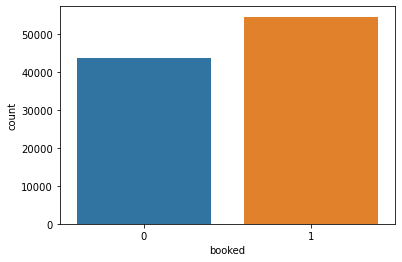

In [31]:
sns.countplot('booked',data=data3)

Now we will write a code to find out the number of unique values in the relevant columns restaurant_name, location, city and medium respectively

In [32]:
cols = ['restaurant_name','location','city','medium']
for i in data3[cols]:
    print('Number of unique values in {} : {}'.format(i, len(data3[i].unique())))

Number of unique values in restaurant_name : 2314
Number of unique values in location : 1232
Number of unique values in city : 168
Number of unique values in medium : 6


We can see that there are very large number of unique categories in the columns restaurant_name, location and city and hence after encoding the number of columns will increase by a large amount and this may introduce the curse of dimensionality. There will be very large number of feature which will in turn increase the error and time of computation.

To prevent this we will encode the top 25 frequent categories in each column which will decrease our number of columns and will also reduce time of computation and prevent the curse of dimensionality.

In [64]:
list1=data3.restaurant_name.value_counts().sort_values(ascending=False).head(25).index
list1=list(list1)
print(list1)

['retaurant_name_null', 'Barbeque Nation', "AB's - Absolute Barbecues", 'Byg Brewski Brewing Company', 'Mainland China', 'Runway1', "The Fisherman's Wharf", 'Flame & Grill', 'Barbeque nation', 'Sigree Global Grill', 'The G.T. Road', 'Uru Brewpark', 'Olive Bistro', '6 Ballygunge Place', 'BOA VILLAGE', 'JW Kitchen', 'Punjab Grill', 'Claw BBQ Crabshack & Grill', 'Farzi Cafe', 'Lord of the Drinks', 'Olive Bar & Kitchen', 'Oh! Calcutta', 'DRAMZ', 'The Big Barbeque', 'Bukhara']


In [65]:
for categories in list1:
  data3['r' + '_' + categories]=np.where(data3['restaurant_name']==categories,1,0)

In [66]:
list2=data3.location.value_counts().sort_values(ascending=False).head(25).index
list2=list(list2)
print(list2)

['location_null', 'Connaught Place (CP), Central Delhi', 'Banjara Hills, Hyderabad', 'Patna', 'JP Nagar, South Bengaluru', 'Visakhapatnam', 'Indiranagar, East Bengaluru', 'Jubilee Hills, Hyderabad', 'Rajajinagar, West Bengaluru', 'Mehrauli, South Delhi', 'Hennur, North Bengaluru', 'Sector 26, Chandigarh', 'Guwahati', 'Vijayawada', 'Koramangala, South Bengaluru', 'Sarjapur Road, South Bengaluru', 'Durgapur', 'Tirupati', 'Bhubaneswar', 'Coimbatore', 'Metro Walk Mall, Rohini', 'Trichy', 'Park Street Area, Kolkata', 'Kalyan Nagar, North Bengaluru', 'Gachibowli, Hyderabad']


In [67]:
for category in list2:
    data3['L' + '_' + category]=np.where(data3['location']==category,1,0)

In [68]:
list3=data3.city.value_counts().sort_values(ascending=False).head(25).index
list3=list(list3)
print(list3)

['city_null', 'Delhi NCR', 'Bengaluru', 'Hyderabad', 'Mumbai', 'Kolkata', 'Chennai', 'Pune', 'Chandigarh', 'Dubai', 'Patna', 'Goa', 'Jaipur', 'Visakhapatnam', 'Ahmedabad', 'Lucknow', 'Guwahati', 'Vijayawada', 'Durgapur', 'Tirupati', 'Bhubaneswar', 'Coimbatore', 'Trichy', 'Ludhiana', 'Madurai']


In [69]:
for cat in list3:
   data3['C' + '_' + cat]=np.where(data3['city']==cat,1,0)

In [70]:
df = pd.get_dummies(data3['medium'],drop_first=True)

In [71]:
data3_final = pd.concat([df,data3],axis=1)

In [72]:
data3_final.head()

,api_partner,concierge,google,ios,web,date,medium_x,restaurant_name,location,cust_id,...,C_Mangalore,C_Nagpur,C_Nellore,C_Jalandhar,C_Agra,C_Dehradun,C_Vellore,C_Jammu,C_Prayagraj,C_Kolhapur
0,0,0,0,0,1,2020-09-04,web,Spectra,"The Leela Ambience, Gurgaon",5015431352112,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,NaT,NaN,retaurant_name_null,location_null,5015431352113,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,NaT,NaN,retaurant_name_null,location_null,5015431352114,...,0,0,0,0,0,0,0,0,0,0
3,0,0,1,0,0,2020-09-06,google,Barbeque Nation,"Park Street Area, Kolkata",5015431352115,...,0,0,0,0,0,0,0,0,0,0
4,0,0,1,0,0,NaT,NaN,retaurant_name_null,location_null,5015431352120,...,0,0,0,0,0,0,0,0,0,0


Now we will split the features and label column to apply our ML model.

In [73]:
cols = ['date','medium_x','restaurant_name','location','cust_id','city','name','gender','medium_y','signup_date','booked','medium']
X = data3_final.drop(data3[cols],axis=1)
y = data3_final['booked']

In [74]:
X.head()

,api_partner,concierge,google,ios,web,AGE,duration,r_retaurant_name_null,r_Barbeque Nation,r_AB's - Absolute Barbecues,...,C_Mangalore,C_Nagpur,C_Nellore,C_Jalandhar,C_Agra,C_Dehradun,C_Vellore,C_Jammu,C_Prayagraj,C_Kolhapur
0,0,0,0,0,1,72,3,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,45,8,1,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,29,8,1,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,1,0,0,60,5,0,1,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,1,0,0,32,8,1,0,0,...,0,0,0,0,0,0,0,0,0,0


In [75]:
y.head()

0    1
1    0
2    0
3    1
4    0
Name: booked, dtype: int32

Now we will split the data into training data and test data in the ratio of 0.75 to 0.25 respectively.

In [76]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25,random_state = 1)

In [77]:
X_train.shape

(73765, 132)

In [78]:
X_test.shape

(24589, 132)

In [79]:
y_train.value_counts()

1    41067
0    32698
Name: booked, dtype: int64

In [80]:
y_test.value_counts()

1    13620
0    10969
Name: booked, dtype: int64

In [81]:
X_train.head()

,api_partner,concierge,google,ios,web,AGE,duration,r_retaurant_name_null,r_Barbeque Nation,r_AB's - Absolute Barbecues,...,C_Mangalore,C_Nagpur,C_Nellore,C_Jalandhar,C_Agra,C_Dehradun,C_Vellore,C_Jammu,C_Prayagraj,C_Kolhapur
82538,0,0,1,0,0,50,22,0,0,0,...,0,0,0,0,0,0,0,0,0,0
58777,0,0,1,0,0,35,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
32085,0,0,1,0,0,47,8,1,0,0,...,0,0,0,0,0,0,0,0,0,0
10606,0,0,1,0,0,46,61,0,1,0,...,0,0,0,0,0,0,0,0,0,0
23317,0,0,1,0,0,54,4,0,1,0,...,0,0,0,0,0,0,0,0,0,0


In [82]:
y_test.head()

60439    1
15758    0
48764    0
59580    0
62844    0
Name: booked, dtype: int32

Here we can easily observe that we have to essentially perform classification and hence to get a more stable and accurate prediction we will use random forest classifier.

In [83]:
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier(random_state=1)
classifier.fit(X_train, y_train)

RandomForestClassifier(random_state=1)

According to the problem statement ,if the probability of a person bookin within 7 days after signing up is greater than 20% we will put him/her in a 1 bucket else in the 0 bucket. Hence, the lower limit is 0.2.

In [84]:
prob_preds = classifier.predict_proba(X_test)
lower_limit = 0.2
y_pred = [1 if prob_preds[i][1]>= lower_limit else 0 for i in range(len(prob_preds))]

Now we will create a confusion matrix to get the accuracy score.

In [85]:
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
cm = confusion_matrix(y_test, y_pred)
print(cm)
print('Accuracy : {}'.format(accuracy_score(y_test, y_pred)))

[[10951    18]
 [    0 13620]]
Accuracy : 0.9992679653503599


In [86]:
from sklearn.model_selection import cross_val_score
accuracies = cross_val_score(estimator = classifier, X = X_train, y = y_train, cv = 100)
print("Accuracy: {} ".format(accuracies.mean()))
print("Standard Deviation: {}".format(accuracies.std()))

Accuracy: 1.0 
Standard Deviation: 0.0


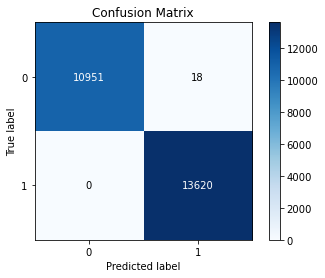

In [87]:
skplt.metrics.plot_confusion_matrix(y_test,y_pred)
plt.show()

In [88]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     10969
           1       1.00      1.00      1.00     13620

    accuracy                           1.00     24589
   macro avg       1.00      1.00      1.00     24589
weighted avg       1.00      1.00      1.00     24589



Hence we can see that our random forest classification model is successfull with a prediction accuracy of 0.9926 and hence we can predict whether a person who signs up with eazydiner will make a booking within 7 days or not.